https://medium.com/@makcedward/data-augmentation-for-audio-76912b01fdf6

https://ai.googleblog.com/2019/04/specaugment-new-data-augmentation.html

https://www.kaggle.com/CVxTz/audio-data-augmentation

https://www.kaggle.com/haqishen/augmentation-methods-for-audio

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=12&ved=2ahUKEwi-xIXHoProAhVr5KYKHVuUCfQ4ChAWMAF6BAgDEAE&url=https%3A%2F%2Fzenodo.org%2Frecord%2F1066137%2Ffiles%2FSiddharth_Master_Thesis.pdf%3Fdownload%3D1&usg=AOvVaw3AherMfcZpE5Icfy7C5QoM

https://patents.google.com/patent/US20170040016

In [140]:
import librosa
import os
BASE_FOLDER =  r'../../'
file_path = r'\dataset\6dB\fan\id_02\abnormal\00000002.wav'
file_path = r'\dataset\6dB\pump\id_02\normal\00000004.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
noisy_signal = ch[0]

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


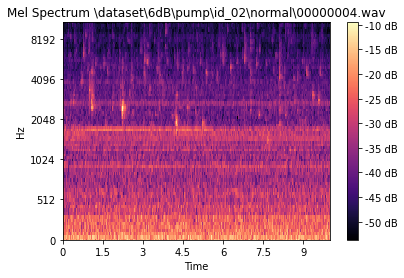

In [142]:
# create mel to see the effect
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
def mel(s):
    wmf = memory_wave_file()
    wmf.filepath=file_path
    wmf.srate=sr
    wmf.channel=[s]
    fe_mel = feature_extractor_mel(BASE_FOLDER,'mel1')
    fe_mel.set_hyperparamter(n_mels=80, n_fft=1024, channel=0)
    fe_mel.create_from_wav(wmf)
    fe_mel.plot()

mel(noisy_signal)

In [90]:
# over exite a band
# random band
def get_rand_fband():
    base = 500
    limit = 4000
    band = np.random.random_sample()*0.4
    frc = base + np.random.random_sample()*(limit -base)
    frc_u = frc*(1.+band)
    frc_l = frc*(1.-band)
    return frc_l, frc_u

print(get_rand_fband())
print(get_rand_fband())
print(get_rand_fband())
print(get_rand_fband())



(3107.540684556253, 4050.0771540612536)
(1141.6294661273976, 2114.79262331314)
(2522.2806361183243, 3819.201008161314)
(2154.833984777217, 3158.4159369958866)


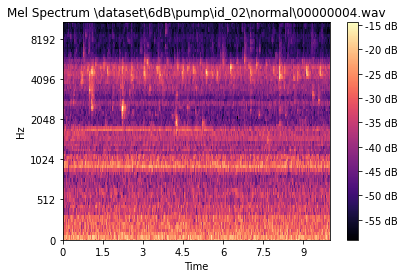

In [100]:
def design_band_bass(sr,frc_l, frc_u):
    filtorder = 16*np.round(sr/frc_l)+1
    lower_trans = .1
    upper_trans = .1
    rand_increas = np.random.random_sample()*0.5
    rand_decreas = np.random.random_sample()*0.1
    filter_shape = [ 1-rand_decreas,1-rand_decreas,
                    1+rand_increas,1+rand_increas,
                    1-rand_decreas,1-rand_decreas ]
    filter_freqs = [ 0, frc_l*(1-lower_trans), frc_l, frc_u, \
                frc_u+frc_u*upper_trans,  sr/2 ]
    filterkern = scipy.signal.firls(filtorder,filter_freqs,filter_shape,fs=sr)
    return filterkern

def apply_filter(fker,s):
    return scipy.signal.filtfilt(fker,1,s) 

def aug_band_chain(s,sr,n=3):
    sout = s
    for i in range(n):
        frc_l, frc_u = get_rand_fband()
        fkern = design_band_bass(sr,frc_l, frc_u)
        sout = apply_filter(fkern,sout)
    return sout

#frc_l, frc_u = get_rand_fband()    
#aug_signal = scipy.signal.filtfilt(design_band_bass(sr,frc_l, frc_u),1,noisy_signal)   
mel(aug_band_chain(noisy_signal,sr,n=4))



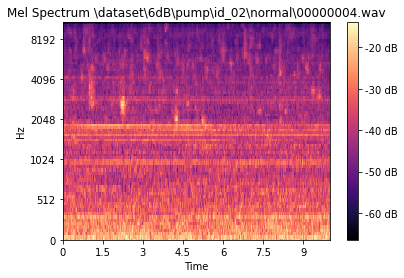

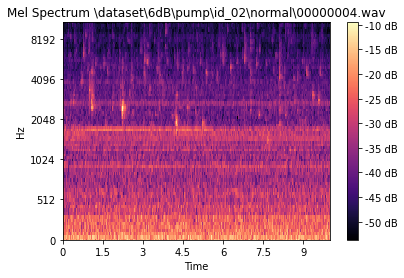

In [110]:
#y_slow = librosa.effects.time_stretch(noisy_signal, 1.1)
y_slow = librosa.effects.pitch_shift(noisy_signal, sr, n_steps=1)
mel(y_slow)
plt.show()
mel(noisy_signal)

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother


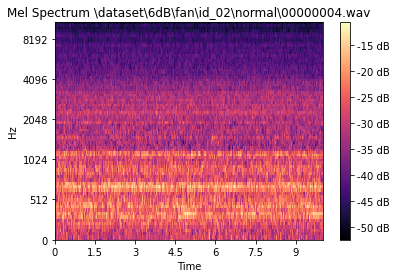

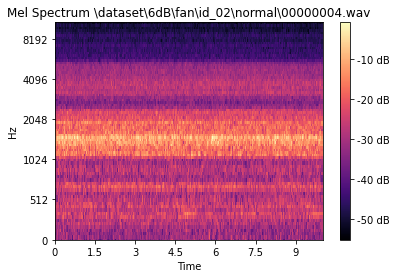

In [162]:
# Test
import librosa
import os
BASE_FOLDER =  r'../../'
file_path = r'\dataset\6dB\fan\id_02\normal\00000004.wav'
ch, sr = librosa.load(os.path.abspath(BASE_FOLDER+file_path), sr=None, mono=False)
noisy_signal = ch[0]

%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
wmf = memory_wave_file()
wmf.filepath = file_path
wmf.channel = [noisy_signal]
wmf.srate = sr
wmf.length = len(noisy_signal)

wmf_r = create_augmenter(wmf)
mel(wmf.channel[0])
plt.show()
mel(wmf_r.channel[0])

In [147]:
import random 
pitch  = np.random.random_sample()>0.5
bandadd = random.randint(2,6)

In [131]:
# dmping main freq
# fft
# peack find
# random main gain array
# peack widness estimation
# bandpass robust design
# apply

In [132]:
# changing pitch


In [ ]:
# increasing main freq

In [ ]:
# speed change time stratch